# 테크닉 91 : 데이터를 불러서 파악해 보자

In [5]:
import pandas as pd
from pandasql import sqldf

df_survey = pd.read_csv("./pyda100-master/Chapter_10/survey.csv")
print("* df_survey : ")
display(sqldf("SELECT * FROM df_survey;"))

* df_survey : 


,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다(AA역),1
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5
2,2019-02-18,육아 지원이 좋다,5
3,2019-04-09,어린이집에 바로 입원할 수 있다(대기아동 없음),4
4,2019-01-06,역앞 상가가 쓸쓸하다,2
...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2
83,2019-01-09,공원에 놀이기구가 너무 적다,1
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2


In [6]:
print("* check null value :")
display(df_survey.isna().sum())

print("* delete null value in df_survey :")
df_survey = sqldf("SELECT * FROM df_survey WHERE comment IS NOT NULL")
display(df_survey)

print("* check null value :")
display(df_survey.isna().sum())

* check null value :


datetime        0
comment         2
satisfaction    0
dtype: int64

* delete null value in df_survey :


,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다(AA역),1
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5
2,2019-02-18,육아 지원이 좋다,5
3,2019-04-09,어린이집에 바로 입원할 수 있다(대기아동 없음),4
4,2019-01-06,역앞 상가가 쓸쓸하다,2
...,...,...,...
79,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5
80,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2
81,2019-01-09,공원에 놀이기구가 너무 적다,1
82,2019-03-09,공원을 더 늘렸으면 좋겠다,2


* check null value :


datetime        0
comment         0
satisfaction    0
dtype: int64

# 테크닉 92 : 불필요한 문자를 제거하자

In [7]:
df_survey["comment"] = df_survey["comment"].str.replace("\(.+?\)", "")
print("* delete unnecessary characters in comment column :")
display(df_survey)

* delete unnecessary characters in comment column :


,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다,1
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5
2,2019-02-18,육아 지원이 좋다,5
3,2019-04-09,어린이집에 바로 입원할 수 있다,4
4,2019-01-06,역앞 상가가 쓸쓸하다,2
...,...,...,...
79,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5
80,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2
81,2019-01-09,공원에 놀이기구가 너무 적다,1
82,2019-03-09,공원을 더 늘렸으면 좋겠다,2


# 테크닉 93 : 문자 수를 세어 히스토그램으로 표시해 보자

* create length column :


,datetime,comment,satisfaction,length
0,2019-03-11,역앞에 젊은이들이 모여있다,1,14
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5,21
2,2019-02-18,육아 지원이 좋다,5,9
3,2019-04-09,어린이집에 바로 입원할 수 있다,4,17
4,2019-01-06,역앞 상가가 쓸쓸하다,2,11
...,...,...,...,...
79,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5,22
80,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2,26
81,2019-01-09,공원에 놀이기구가 너무 적다,1,15
82,2019-03-09,공원을 더 늘렸으면 좋겠다,2,14


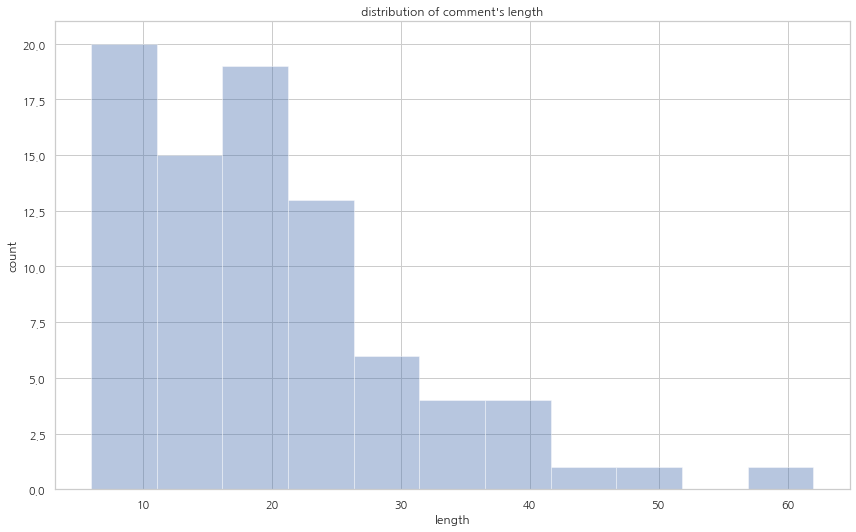

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print("* create length column :")
df_survey = sqldf("SELECT datetime, comment, satisfaction, LENGTH(comment) AS length FROM df_survey;")
display(df_survey)

plt.figure(figsize = (12, 7.5))
sns.distplot(df_survey["length"], kde = False)
plt.title("distribution of comment's length")
plt.xlabel("length")
plt.ylabel("count")
plt.tight_layout()
plt.show()

# 테크닉 94 : 형태소 분석으로 문장을 분해해보자

In [15]:
from konlpy.tag import Twitter

twt = Twitter()
text = "형태소분석으로 문장을 분해해보자"
tagging = twt.pos(text)
print("* tagging :", tagging)


* tagging : [('형태소', 'Noun'), ('분석', 'Noun'), ('으로', 'Josa'), ('문장', 'Noun'), ('을', 'Josa'), ('분해', 'Noun'), ('해보자', 'Verb')]


In [19]:
# 결과 리스트에서 단어만 따로 특정 리스트 변수에 저장하기

tagging = twt.pos(text)
list_of_words = []
for tuple_of_word_n_pos in tagging :

    word = tuple_of_word_n_pos[0]
    list_of_words.append(word)

print("* list_of_words :", list_of_words)

* list_of_words : ['형태소', '분석', '으로', '문장', '을', '분해', '해보자']


# 테크닉 95 : 형태소 분석으로 문장에서 '동사', '명사'를 추출해 보자

In [20]:
# 결과 리스트에서 품사가 '명사'또는 '동사'인 단어만 따로 특정 리스트 변수에 저장하기

text = "형태소분석으로 문장을 분해해보자"
list_of_words = []
parts = ["Noun", "Verb"]
tagging = twt.pos(text)
for tuple_of_word_n_pos in tagging :

    word = tuple_of_word_n_pos[0]
    part = tuple_of_word_n_pos[1]
    if part in parts :

        list_of_words.append(word)

print("* list_of_words :", list_of_words)

* list_of_words : ['형태소', '분석', '문장', '분해', '해보자']


# 테크닉 96 : 형태소 분석으로 자주 나오는 명사를 확인해 보자

In [21]:
all_words = []
parts = ["Noun"]
for n in range(len(df_survey)) :

    comment = df_survey["comment"].iloc[n]
    tagging_in_one_comment = twt.pos(comment)
    list_of_words_in_one_comment = []
    for tuple_of_word_n_pos in tagging_in_one_comment :

        word = tuple_of_word_n_pos[0]
        part = tuple_of_word_n_pos[1]
        if part in parts :

            list_of_words_in_one_comment.append(word)
    
    all_words.extend(list_of_words_in_one_comment)

print("* all_words :")
print(all_words)

* all_words :
['역앞', '젊은이', '운동', '수', '장소', '것', '육아', '지원이', '어린이집', '바로', '입원', '수', '역앞', '상가', '생활', '놀', '장소', '놀', '장소', '상업시설', '좀', '더', '병원', '사이클링', '코스', '축제', '좀', '더', '성대', '초등학교', '공원', '더', '근처', '공원', '살기', '슈퍼', '육아', '데이트', '명소', '상가', '좀', '더', '밤길', '쓰레기', '처리', '영화관', '가로수', '더', '공원', '추가', '관광', '명소', '육아', '최고', '길이', '시내', '접근성', '집세', '합리', '의', '교통', '체증', '게', '해', '상가', '지붕', '비', '큰일', '상가', '더', '카페', '스포츠', '센터', '자주', '이용', '스포츠', '센터', '이용', '요금', '워킹맘', '지원', '더', '버스', '별로', '안', '자전거', '달리기', '달리기', '운동', '수', '장소', '기업', '역앞', '주차장', '아저씨', '말', '적', '경찰', '순찰', '더', '소방', '활동', '수', '재난', '시', '피난', '장소', '것', '요즘', '강', '범람', '피해', '크게', '이', '도시', '범람', '방지', '취하', '설명', '신호등', '사거리', '때문', '사고', '신호', '상가', '활성화', '활동', '좀더', '행정', '뒷받침', '아이', '놀', '장소', '역앞', '자전거', '주차장', '가로수', '낙엽', '청소', '가로수', '재해', '시', '비축', '상황', '보도', '길이', '수', '지역', '자치', '단체', '더', '지원', '자치', '단체', '활동', '안심', '살', '수', '관광지', '최근', '지방', '넘버', '치안', '제대로', '주차

In [24]:
# 단어별 등장횟수 집계

df_of_all_words = pd.DataFrame({"words" : all_words})
df_count_by_word = sqldf("SELECT words, COUNT(words) AS cnt FROM df_of_all_words GROUP BY words ORDER BY cnt DESC")
print("* df_count_by_word :")
display(df_count_by_word)

* df_count_by_word :


,words,cnt
0,더,14
1,수,7
2,장소,6
3,주차장,5
4,좀,5
...,...,...
182,게,1
183,걸,1
184,걱정,1
185,거리,1


# 테크닉 97 : 관계없는 단어(불용어)를 제거해 보자

In [26]:
stop_words = ["더", "수", "좀"]
all_words = []
parts = ["Noun"]
for n in range(len(df_survey)) :

    comment = df_survey["comment"].iloc[n]
    tagging_in_one_comment = twt.pos(comment)
    list_of_words_in_one_comment = []
    for tuple_of_word_n_pos in tagging_in_one_comment :

        word = tuple_of_word_n_pos[0]
        part = tuple_of_word_n_pos[1]
        if part in parts and word not in stop_words :

            list_of_words_in_one_comment.append(word)
    
    all_words.extend(list_of_words_in_one_comment)

df_of_all_words = pd.DataFrame({"words" : all_words})
df_count_by_word = sqldf("SELECT words, COUNT(words) AS cnt FROM df_of_all_words GROUP BY words ORDER BY cnt DESC")
print("* df_count_by_word :")
display(df_count_by_word)

* df_count_by_word :


,words,cnt
0,장소,6
1,주차장,5
2,역앞,5
3,상가,5
4,공원,5
...,...,...
179,게,1
180,걸,1
181,걱정,1
182,거리,1


# 테크닉 98 : 고객만족도와 자주 나오는 단어의 관계를 살펴보자

In [29]:
stop_words = ["더", "수", "좀"]
all_words = []
satisfaction = []
parts = ["Noun"]
for n in range(len(df_survey)) :

    comment = df_survey["comment"].iloc[n]
    tagging_in_one_comment = twt.pos(comment)
    list_of_words_in_one_comment = []
    for tuple_of_word_n_pos in tagging_in_one_comment :

        word = tuple_of_word_n_pos[0]
        part = tuple_of_word_n_pos[1]
        if part in parts and word not in stop_words :

            list_of_words_in_one_comment.append(word)
            satisfaction.append(df_survey["satisfaction"].iloc[n])
    
    all_words.extend(list_of_words_in_one_comment)

df_of_all_words = pd.DataFrame({"words" : all_words, "satisfaction" : satisfaction})
df_count_and_mean_of_satisfaction_by_word = sqldf("""
                                                        SELECT words,
                                                               cnt,
                                                               mean_of_satisfaction
                                                        FROM (
                                                            SELECT words, 
                                                                COUNT(1) AS cnt,
                                                                AVG(satisfaction) AS mean_of_satisfaction 
                                                            FROM df_of_all_words 
                                                            GROUP BY words 
                                                        )
                                                        WHERE cnt >= 3
                                                        ORDER BY mean_of_satisfaction DESC
                                                  """)
print("* df_count_and_mean_of_satisfaction_by_word :")
display(df_count_and_mean_of_satisfaction_by_word)

* df_count_and_mean_of_satisfaction_by_word :


,words,cnt,mean_of_satisfaction
0,육아,3,4.333333
1,관공서,4,3.500000
2,길이,4,3.500000
3,활동,3,3.333333
4,장소,6,3.000000
5,시,4,2.750000
6,처리,3,2.333333
7,공원,5,2.200000
8,상가,5,2.200000
9,놀,3,2.000000
